# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning
## Problemas de Classificação

# Importação dos dados

Usaremos a mesma base de dados que trabalhamos anteriormente, o dataset Pima Indians Diabetes. O trecho de código a seguir é idêntico ao que fizemos no laboratório passado e serve apenas para importar os dados e separá-los em entradas (X) e saídas (Y).

In [0]:
# Carrega arquivo csv usando Pandas usando uma URL

# Importa todo o pacote Pandas
import pandas as pd

# Importa a função datasets
from sklearn import datasets

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Informa o cabeçalho das colunas
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

# Pega apenas os dados do dataset e guardando em um array
array = dataset.values

# Separa o array em variáveis preditoras (X) e variável target (Y)
X = array[:,0:8]
Y = array[:,8]

O trecho de código a seguir ilustra como importar um dos datasets que já vem junto com o scikit-learn. São eles:

* load_boston([return_X_y])	- **boston house-prices** (regressão).
* load_iris([return_X_y])	- **iris** (classificação).
* load_diabetes([return_X_y])	- **diabetes** (regressão).
* load_digits([n_class, return_X_y]) - **digits** (classificação).
* load_linnerud([return_X_y])	- **linnerud** (regressão multivariada).
* load_wine([return_X_y])	- **wine** (classificação).
* load_breast_cancer([return_X_y]) - **breast cancer wisconsin** (classificação).

In [0]:
# NÃO EXECUTAR PARA O LABORATÓRIO!

# Datasets do scikit-learn: https://scikit-learn.org/stable/datasets/index.html

# Importação de pacotes
import pandas as pd
import numpy as np
from sklearn import datasets

# Carrega o dataset iris
iris = datasets.load_iris()

# Converte para dataframe
dataframe = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Mostra as 5 primeiras linhas do dataset
dataframe.head(5)

# Extraindo os 2 primeiros atributos para variáveis preditoras (x) e variável target (y)
x_iris = iris.data[:, :2] 
y_iris = iris.target

# Resampling: Particionamento do dataset

## Particionamento em Conjuntos de Treino e Teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
# Import dos pacotes
from sklearn.model_selection import train_test_split

# Definição do tamanho do conjunto de teste para 33%
teste_size = 0.33

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

## Validação Cruzada (K-fold Cross-Validation)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [0]:
# Avaliação usando Cross Validation

# Import dos pacotes
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Definição dos valores para os folds e seed
num_folds = 10
seed = 7

# Definindo os folds
kfold = KFold(num_folds, True, random_state = seed)

# Métricas de Avaliação para Problemas de Classificação

http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html

http://scikit-learn.org/stable/modules/model_evaluation.html

Para ilustrar as métricas, precisaremos criar um modelo qualquer. Vamos usar a Regressão Logística.

In [0]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver='liblinear')

## Acurácia

**Acurácia = número de previsões corretas/todas as previsões**

É a métrica de avaliação mais comum para problemas de classificação, mas é também a mais mal utilizada. Ela só é adequada quando as classes são equilibradas e que todos os erros de previsão são igualmente importantes, o que geralmente não é o caso.

In [0]:
### 1. Usando validação cruzada

# Calculando a acurácia usando o modelo criado anteriormente
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia de teste: %.2f%%" % (resultado.mean() * 100))

Acurácia de teste: 77.09%


In [0]:
### 2. Usando conjuntos de treino e teste

# Treinamento do modelo criado anteriormente
modeloTreinado = modelo.fit(X_treino, Y_treino)

# Previsões
Y_pred = modeloTreinado.predict(X_teste)

# Resultados
corretas = (Y_teste == Y_pred).sum()
total = Y_teste.shape[0]

# Print dos resultados
print("Acurácia com particionamento treino-teste: %.2f%%" % (corretas / total * 100))

Acurácia com particionamento treino-teste: 75.59%


## Área sobre a curva ROC (AUC)

Métrica de performance para classificação binária, em que podemos definir as classes em positiavs e negativas. Estes problemas são um *trade-off* entre Sensitivity (Sensibilidade) e Specifity (Especificidade).
* Sensitivity: a taxa de verdadeiros positivos (TP). Número de instâncias positivas da primeira classe que foram previstas corretamente.
* Specifity: a taxa de verdadeiros negativos (TN). Número de instâncias da segunda classe que foram previstas corretamente.

Valores acima de 0.5 indicam uma boa taxa de previsão.

In [0]:
# Calculando a AUC usando a validação cruzada e o modelo criado anteriormente
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.2f%%" % (resultado.mean() * 100))

AUC: 82.58%


## Combinando métricas

Com a biblioteca cross_validate é possível exibir diversas métricas, incluindo as métricas de treino e teste. Veja mais em: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

A lista de métricas suportadas está disponível em: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [0]:
# Import da função
from sklearn.model_selection import cross_validate

# Calculando a acurácia e a AUC usando a validação cruzada e o modelo criado anteriormente
resultado = cross_validate(modelo, X, Y, cv = kfold,
                        scoring=('accuracy', 'roc_auc'),
                        return_train_score=True)
   
print("train_accuracy: %.2f%%" % ((resultado['train_accuracy'].mean()) * 100) )
print("test_accuracy: %.2f%%" % ((resultado['test_accuracy'].mean()) * 100) )
print("train_roc_auc: %.2f%%" % ((resultado['train_roc_auc'].mean()) * 100) )
print("test_roc_auc: %.2f%%" % ((resultado['test_roc_auc'].mean()) * 100) )

train_accuracy: 77.79%
test_accuracy: 77.09%
train_roc_auc: 83.63%
test_roc_auc: 82.58%


## Matriz de Confusão

Como a matriz de confusão não é uma métrica única, ela não é suportada pelas funções *cross_val_score* e *cross_validate*. É mais fácil gerá-la usando o particionamento em conjuntos de treino e teste.

In [0]:
# Matriz de Confusão

# Import da função
from sklearn.metrics import confusion_matrix

# Resultado do modelo nos dados de teste 
previsoes = modelo.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes) 
print(matrix)

[[141  21]
 [ 41  51]]


## Relatório de Métricas de Classificação do scikit-learn

O scikit-learn também disponibiliza uma função que gera um relatório de métricas, a *classification_report*.

In [0]:
# Import da função
from sklearn.metrics import classification_report

# Criação do relatório
report = classification_report(Y_teste, previsoes) 
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



# Algoritmos de Classificação

Vamos criar uma função de treinamento e avaliação que será usada em todos os modelos, para evitar duplicação de código.

In [0]:
from sklearn import metrics

### Treinamento e avaliação do modelo

def treinarAvaliarModelo (modelo):

    ## 1. Usando validação cruzada

    print("=== Usando validação cruzada ===")

    # Aplicação do modelo e cálculo dos resultados
    resultado = cross_validate(modelo, X, Y, cv = kfold,
                            scoring=('accuracy', 'roc_auc'),
                            return_train_score=True)

    print("Acurácia de treino: %.2f%%" % ((resultado['train_accuracy'].mean()) * 100) )
    print("Acurácia de teste: %.2f%%" % ((resultado['test_accuracy'].mean()) * 100) )
    print("AUC de treino: %.2f%%" % ((resultado['train_roc_auc'].mean()) * 100) )
    print("AUC de teste: %.2f%%" % ((resultado['test_roc_auc'].mean()) * 100) )
    print("\n")

    ## 2. Usando conjuntos de treino e teste em vez de validação cruzada
    
    print("=== Usando particionamento treino-teste ===")

    # Treinamento
    modeloTreinado = modelo.fit(X_treino, Y_treino)

    # Previsões
    Y_pred = modeloTreinado.predict(X_teste)

    # Resultados
    corretas = (Y_teste == Y_pred).sum()
    total = Y_teste.shape[0]

    # Print dos resultados   
    print("Acurácia de teste: %.2f%%" % (corretas / total * 100))
    print("\n")
    print(metrics.classification_report(Y_teste, Y_pred))
    print(metrics.confusion_matrix(Y_teste, Y_pred))
    
    return;

Relembrando...
<ul>
<li>Precision: Será que o que eu recuperei tem qualidade?</li>
<li>Recall: Será que eu recuperei tudo que deveria recuperar ?</li>
<li>F1-score: Faz uma media harmonica entre os dois</li>
<li>Support: Qtd de registros do conjunto que se enquadram na classificação</li>
</ul>

## Árvores de Decisão

Os modelos de árvores de decisão constroem uma árvore binária a partir dos dados de treinamento. Os pontos de divisão são escolhidos através da avaliação dos dados de treinamento, com base na contribuição de cada atributo para minimizar uma função de custo (como, por exemplo, o índice Gini, usado para medir a probabilidade de dois itens aleatórios pertencerem à mesma classe). Para construir um modelo do tipo CART (Classification and Regression Trees), podemos usar a classe DecisionTreeClassifier.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**OBS:**
Quais são os vários algoritmos da árvore de decisão e como eles diferem um do outro? Qual é implementado no scikit-learn?

* ID3 (Iterative Dichotomiser 3) foi desenvolvido em 1986 por Ross Quinlan. O algoritmo cria uma árvore de múltiplas vias, encontrando para cada nó (isto é, de maneira gulosa) o recurso categórico que produzirá o maior ganho de informação para os alvos categóricos. As árvores crescem no tamanho máximo e, em seguida, geralmente é aplicada uma etapa de poda para melhorar a capacidade da árvore de generalizar para dados não vistos.

* C4.5 é o sucessor do ID3 e removeu a restrição de que os recursos devem ser categóricos, definindo dinamicamente um atributo discreto (com base em variáveis numéricas) que particiona o valor do atributo contínuo em um conjunto discreto de intervalos. C4.5 converte as árvores treinadas (ou seja, a saída do algoritmo ID3) em conjuntos de regras if-then. Essa precisão de cada regra é então avaliada para determinar a ordem em que elas devem ser aplicadas. A poda é feita removendo a pré-condição de uma regra se a precisão da regra melhorar sem ela.

* C5.0 é o lançamento de uma versão mais recente da C4.5 sob uma licença proprietária. Ele usa menos memória e cria conjuntos de regras menores que o C4.5, sendo mais preciso.

* CART (Classification and Regression Trees) é muito semelhante ao C4.5, mas difere no fato de suportar variáveis de saída numéricas (problemas de regressão) e não computar conjuntos de regras. O CART constrói árvores binárias usando os atributos que produzem o maior ganho de informação em cada nó.

**O scikit-learn usa uma versão otimizada do algoritmo CART; no entanto, a implementação do scikit-learn não suporta variáveis categóricas por enquanto.**

In [0]:
# Árvore de Classificação CART

# Import da função
from sklearn.tree import DecisionTreeClassifier

# Escolhendo o modelo
modelo = DecisionTreeClassifier()

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>


=== Usando validação cruzada ===
Acurácia de treino: 100.00%
Acurácia de teste: 69.15%
AUC de treino: 100.00%
AUC de teste: 65.82%


=== Usando particionamento treino-teste ===
Acurácia de teste: 71.26%


              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78       162
         1.0       0.60      0.60      0.60        92

    accuracy                           0.71       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.71      0.71      0.71       254

[[126  36]
 [ 37  

Também é possível especificar valores para os parâmetros da árvore de classificação:

In [0]:
# Criando o modelo já com os parâmetros desejados
modelo = DecisionTreeClassifier(max_depth = None, 
                             max_features = None, 
                             criterion = 'entropy', 
                             min_samples_leaf = 1, 
                             min_samples_split = 2)
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>


=== Usando validação cruzada ===
Acurácia de treino: 100.00%
Acurácia de teste: 68.76%
AUC de treino: 100.00%
AUC de teste: 66.07%


=== Usando particionamento treino-teste ===
Acurácia de teste: 71.26%


              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       162
         1.0       0.61      0.55      0.58        92

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254

[[130  32]
 [ 4

É possível plotar a árvore gerada usando a função **plot_tree**. Vamos ilustrar com o dataset Iris, que é menor.

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

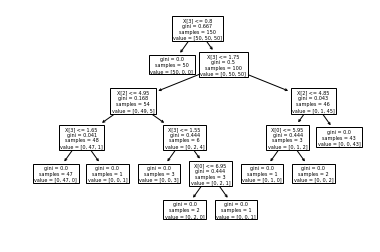

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf.fit(iris.data, iris.target)) 

## KNN
O algoritmo KNN usa uma métrica de distância para encontrar as k instâncias mais semelhantes nos dados de treinamento para uma nova instância e considera o resultado médio dos vizinhos como a previsão. Podemos construir um modelo KNN usando a classe KNeighborsClassifier.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [0]:
# KNN

# Import da função
from sklearn.neighbors import KNeighborsClassifier

# Escolhendo o modelo
modelo = KNeighborsClassifier()

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>


=== Usando validação cruzada ===
Acurácia de treino: 80.22%
Acurácia de teste: 71.10%
AUC de treino: 87.23%
AUC de teste: 72.54%


=== Usando particionamento treino-teste ===
Acurácia de teste: 69.29%


              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       162
         1.0       0.59      0.51      0.55        92

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.69      0.69      0.69       254

[[129  33]
 [ 45  47]]


Vamos agora experimentar variar alguns dos parâmetros do modelo.

In [0]:
# Criação de outro modelo alterando o tipo de distância
modelo = KNeighborsClassifier(metric = 'euclidean')
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

print("\n")

# Criação de outro modelo alterando o valor de k
modelo = KNeighborsClassifier(n_neighbors = 7)
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>


=== Usando validação cruzada ===
Acurácia de treino: 80.22%
Acurácia de teste: 71.10%
AUC de treino: 87.23%
AUC de teste: 72.54%


=== Usando particionamento treino-teste ===
Acurácia de teste: 69.29%


              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       162
         1.0       0.59      0.51      0.55        92

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.69      0.69      0.69       254

[[129  33]
 [ 45  47]]


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     wei

## Naive Bayes
O algoritmo Naive Bayes calcula a probabilidade de cada classe e a probabilidade condicional de cada classe, considerando cada valor de entrada. Essas probabilidades são estimadas para novos dados e multiplicadas juntas, assumindo que sejam todas independentes (uma suposição simples ou ingênua). Ao trabalhar com dados com valores reais, supõe-se que eles seguem uma distribuição Gaussiana. Podemos construir um modelo Naive Bayes usando a classe GaussianNB.

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [0]:
# Naive Bayes

# Import da função
from sklearn.naive_bayes import GaussianNB

# Escolhendo o modelo
modelo = GaussianNB()

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>


=== Usando validação cruzada ===
Acurácia de treino: 76.29%
Acurácia de teste: 75.91%
AUC de treino: 82.51%
AUC de teste: 81.24%


=== Usando particionamento treino-teste ===
Acurácia de teste: 74.41%


              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       162
         1.0       0.65      0.65      0.65        92

    accuracy                           0.74       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.74      0.74      0.74       254

[[129  33]
 [ 32  60]]


## Support Vector Machines
O SVM busca uma linha que melhor separa duas classes. As instâncias de dados mais próximas desta linha são chamadas vetores de suporte e influenciam onde a linha é colocada. O SVM foi estendido para suportar várias classes e é possível utilizar diferentes funções kernel. Por padrão, é usada e função de base radial. Vamos construir um modelo SVM usando a classe SVC.

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://scikit-learn.org/stable/modules/svm.html

In [0]:
# SVM com kernel linear

# Import da função
from sklearn.svm import SVC

# Escolhendo o modelo
modelo = SVC(gamma='auto',kernel = 'linear')

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

# Imprimindo os vetores de suporte
print("\n")
print (modelo.support_)

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


=== Usando validação cruzada ===
Acurácia de treino: 77.62%
Acurácia de teste: 77.08%
AUC de treino: 83.90%
AUC de teste: 82.73%


=== Usando particionamento treino-teste ===
Acurácia de teste: 78.35%


              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       162
         1.0       0.75      0.60      0.67        92

    accuracy                           0.78       254
   macro avg       0.77      0.74      0.75       254
weighted avg       0.78      0.78      0.78       254

[[144  18]
 [ 37  55]]


[  2   6  12  17  20  25  27  29  35  43  46  47  54  59  60  63  65  73
  74  78  83  94  96 100 103 108 117 120 121 122 126 136 138 139 141 144
 148 153 156 157 162

In [0]:
# SVM com kernel RBF (funciona bem para dados não linearmente separáveis, mas pode aprender demais sobre os dados - overfitting)

# Import da função e do pacote metrics
from sklearn.svm import SVC
from sklearn import metrics

# Escolhendo o modelo
modelo = SVC(gamma='auto', kernel = 'rbf')

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModelo(modelo)

# Imprimindo os vetores de suporte
print("\n")
print (modelo.support_)

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


=== Usando validação cruzada ===
Acurácia de treino: 100.00%
Acurácia de teste: 65.11%
AUC de treino: 100.00%
AUC de teste: 62.98%


=== Usando particionamento treino-teste ===
Acurácia de teste: 63.78%


              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78       162
         1.0       0.00      0.00      0.00        92

    accuracy                           0.64       254
   macro avg       0.32      0.50      0.39       254
weighted avg       0.41      0.64      0.50       254

[[162   0]
 [ 92   0]]


[  0   1   2   3   4   5   6   7   8   9  12  13  15  16  17  18  19  20
  22  24  25  27  29  30  31  32  33  34  35  38  39  40  43  44  45  46
  47  49  50  54  55 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Tuning Automático de Hiperparâmetros
Podemos avaliar de forma fácil diversas variações de parâmetros de algoritmos usando a função *GridSearchCV*. Para tal, vamos criar uma função de tuning que recebe um modelo, um conjunto de parâmetros, a métrica de avaliação e o número de folds. Esta função irá imprimir o modelo com o melhor resultado.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/grid_search.html

Vamos padronizar os dados e trabalhar com validação cruzada 10-fold. 

In [0]:
# Import das funções
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Padronização dos dados
scaler = StandardScaler().fit(X)
X_padronizado = scaler.transform(X)

# Definição dos valores para os folds e seed
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
def tuningHiperparametros (modelo, param_grid, scoring, kfold):
  
  # Avaliação de todas as combinações
  grid = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring=scoring, cv=kfold,
      iid=True)
  grid_result = grid.fit(X_padronizado, Y)

  # Imprime o modelo com o melhor resultado
  print("Melhor: %f com %s" % (grid_result.best_score_, grid_result.best_params_)) 

  # Imprime todos os resultados
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) com: %r" % (mean, stdev, param))
  return;

Iremos variar os hiperparâmetros dos modelos: Árvore de Decisão, KNN e SVM. No NaiveBayes não há muito que variar.

## Árvores de Decisão
Vamos testar os critérios gini e entropia e variar o tamanho máximo da árvore e o mínimo de exemplos em cada nó folha.

In [0]:
# Definição dos possíveis valores de hiperparâmetros
criterios = ['gini', 'entropy']
max_depth = [3,5,10,20,30,40,50]
min_samples_leaf = [3,5,10,20,30,40,50]
param_grid = dict(criterion=criterios, min_samples_leaf=min_samples_leaf, max_depth=max_depth)

# Escolha do modelo
modelo = DecisionTreeClassifier()

# Definição da métrica de avaliação
scoring = 'accuracy'
#scoring = 'roc_auc'

# Avaliação de todas as combinações e impressão dos resultados
tuningHiperparametros(modelo, param_grid, scoring, kfold)

Melhor: 0.768229 com {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}
0.744792 (0.067192) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
0.744792 (0.067192) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.747396 (0.065277) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.750000 (0.063736) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.751302 (0.061211) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 30}
0.753906 (0.064729) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 40}
0.755208 (0.063515) com: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.742188 (0.073153) com: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}
0.744792 (0.081988) com: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.757812 (0.081377) com: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.755208 (0.090481) com: {'criterion': 'gini', 'max

## KNN
O número padrão de vizinhos (k) para o KNN é 5. Vamos testar todos os valores ímpares entre 1 a 21 para k, cobrindo o valor padrão de 5 e 3 diferentes medidas de distância.

In [0]:
# Definição dos possíveis valores de hiperparâmetros
k = [1,3,5,7,9,11,13,15,17,19,21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

# Escolha do modelo
modelo = KNeighborsClassifier()

# Definição da métrica de avaliação
scoring = 'accuracy'
#scoring = 'roc_auc'

# Avaliação de todas as combinações e impressão dos resultados
tuningHiperparametros(modelo, param_grid, scoring, kfold)

Melhor: 0.761719 com {'metric': 'euclidean', 'n_neighbors': 21}
0.708333 (0.054371) com: {'metric': 'euclidean', 'n_neighbors': 1}
0.746094 (0.066029) com: {'metric': 'euclidean', 'n_neighbors': 3}
0.742188 (0.071583) com: {'metric': 'euclidean', 'n_neighbors': 5}
0.742188 (0.068443) com: {'metric': 'euclidean', 'n_neighbors': 7}
0.743490 (0.071178) com: {'metric': 'euclidean', 'n_neighbors': 9}
0.747396 (0.053738) com: {'metric': 'euclidean', 'n_neighbors': 11}
0.746094 (0.048545) com: {'metric': 'euclidean', 'n_neighbors': 13}
0.739583 (0.054897) com: {'metric': 'euclidean', 'n_neighbors': 15}
0.743490 (0.062820) com: {'metric': 'euclidean', 'n_neighbors': 17}
0.760417 (0.064617) com: {'metric': 'euclidean', 'n_neighbors': 19}
0.761719 (0.074144) com: {'metric': 'euclidean', 'n_neighbors': 21}
0.694010 (0.042855) com: {'metric': 'manhattan', 'n_neighbors': 1}
0.721354 (0.069181) com: {'metric': 'manhattan', 'n_neighbors': 3}
0.733073 (0.065550) com: {'metric': 'manhattan', 'n_neighbo

## SVM
Podemos ajustar dois parâmetros principais do algoritmo SVM, o valor de C (o quanto flexibilizar a margem) e o tipo de kernel. O padrão para o SVM (classe SVC) é usar o kernel da Função Base Base Radial (RBF) com um valor C definido como 1.0. Vamos testar vários tipos de kernel e valores C com menos viés e mais viés (menor que e maior que 1,0, respectivamente).

In [0]:
# Definição dos possíveis valores de hiperparâmetros
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# Escolha do modelo
modelo = SVC(gamma='auto')

# Definição da métrica de avaliação
scoring = 'accuracy'
#scoring = 'roc_auc'

# Avaliação de todas as combinações e impressão dos resultados
tuningHiperparametros(modelo, param_grid, scoring, kfold)

Melhor: 0.774740 com {'C': 1.5, 'kernel': 'linear'}
0.773438 (0.048948) com: {'C': 0.1, 'kernel': 'linear'}
0.718750 (0.052248) com: {'C': 0.1, 'kernel': 'poly'}
0.755208 (0.053681) com: {'C': 0.1, 'kernel': 'rbf'}
0.755208 (0.056916) com: {'C': 0.1, 'kernel': 'sigmoid'}
0.772135 (0.045249) com: {'C': 0.3, 'kernel': 'linear'}
0.733073 (0.051177) com: {'C': 0.3, 'kernel': 'poly'}
0.772135 (0.061996) com: {'C': 0.3, 'kernel': 'rbf'}
0.730469 (0.044574) com: {'C': 0.3, 'kernel': 'sigmoid'}
0.770833 (0.047759) com: {'C': 0.5, 'kernel': 'linear'}
0.735677 (0.049609) com: {'C': 0.5, 'kernel': 'poly'}
0.769531 (0.059389) com: {'C': 0.5, 'kernel': 'rbf'}
0.718750 (0.045850) com: {'C': 0.5, 'kernel': 'sigmoid'}
0.773438 (0.045619) com: {'C': 0.7, 'kernel': 'linear'}
0.740885 (0.045356) com: {'C': 0.7, 'kernel': 'poly'}
0.769531 (0.059673) com: {'C': 0.7, 'kernel': 'rbf'}
0.712240 (0.049995) com: {'C': 0.7, 'kernel': 'sigmoid'}
0.773438 (0.045619) com: {'C': 0.9, 'kernel': 'linear'}
0.740885 (0.

# Comparação gráfica de algoritmos

Quando trabalhamos em projetos de Machine Learning, geralmente temos vários bons modelos para escolher. Cada modelo terá características de desempenho diferentes. É importante usar várias métricas diferentes para avaliar os algoritmos.

Para que seja feita uma comparação justa, é preciso garantir que cada algoritmo seja avaliado da mesma maneira nos mesmos dados. É importante usar a mesma semente aleatória para garantir que as mesmas divisões nos dados de treinamento sejam executadas e que cada algoritmo seja avaliado precisamente da mesma maneira.

Neste exemplo, iremos avaliar diversos modelos usando uma representação gráfica.

CART: 0.688773 (0.069996)
KNN: 0.742139 (0.071500)
NB: 0.755178 (0.042766)
SVM: 0.764286 (0.056962)


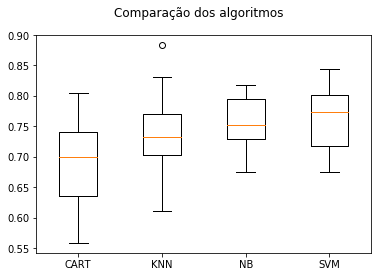

In [0]:
# Comparação de Algortimos

# Import da função
from matplotlib import pyplot

# Lista de modelos a avaliar
modelos = []
# Aqui, poderíamos criar o modelo já parametrizado com os melhores hiperparâmetros da seção anterior
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC(gamma='auto')))

# Treinamento e avaliação de cada modelo
results = []
names = []
scoring = 'accuracy'
for name, model in modelos:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_padronizado, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
  
# Comparação dos algoritmos em boxplot
fig = pyplot.figure() 
fig.suptitle('Comparação dos algoritmos') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()